In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import psycopg2
import warnings

# Suppressing the warning
warnings.filterwarnings("ignore", category=UserWarning)

# PostgreSQL connection parameters
pg_params = {
    "host": "##",
    "database": "postgres",
    "user": "##",
    "password": "##"
}

# Connect to PostgreSQL
pg_connection = psycopg2.connect(**pg_params)

query = "SELECT * FROM drugoverdose"

drug_overdose_df = pd.read_sql(query, pg_connection)

pg_connection.close()

/Users/punyakn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


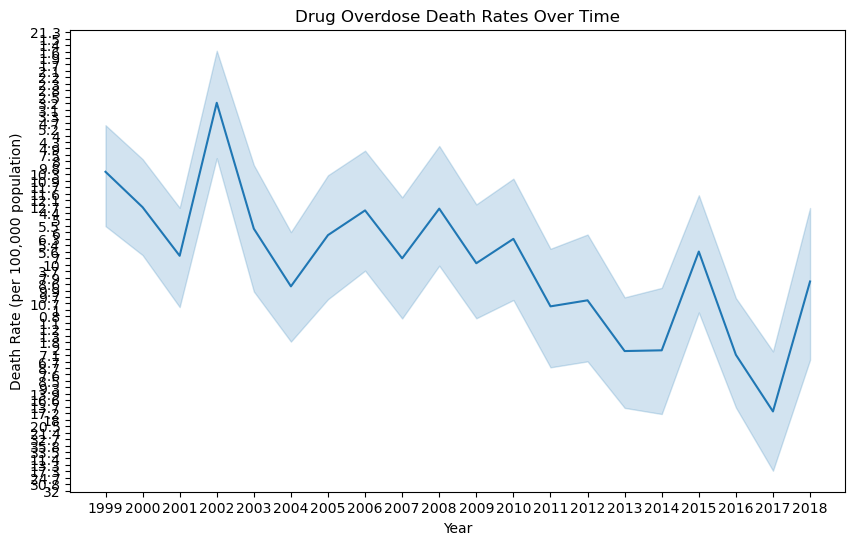

In [2]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='estimate', data=drug_overdose_df)
plt.title('Drug Overdose Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.show()

In [11]:
drug_overdose_df['estimate'] = pd.to_numeric(drug_overdose_df['estimate'], errors='coerce')  # Convert 'estimate' to numeric
drug_overdose_df['stub_name'] = drug_overdose_df['stub_name'].astype('category')  # Convert 'stub_name' to categorical


/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


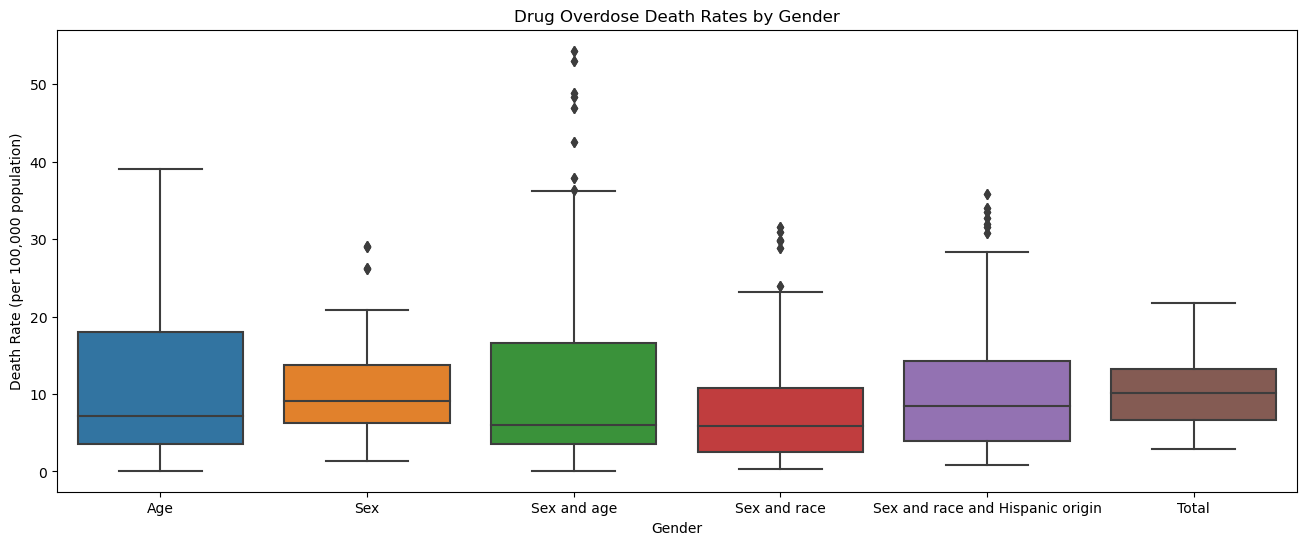

In [12]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='stub_name', y='estimate', data=drug_overdose_df)
plt.title('Drug Overdose Death Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Death Rate (per 100,000 population)')
plt.show()

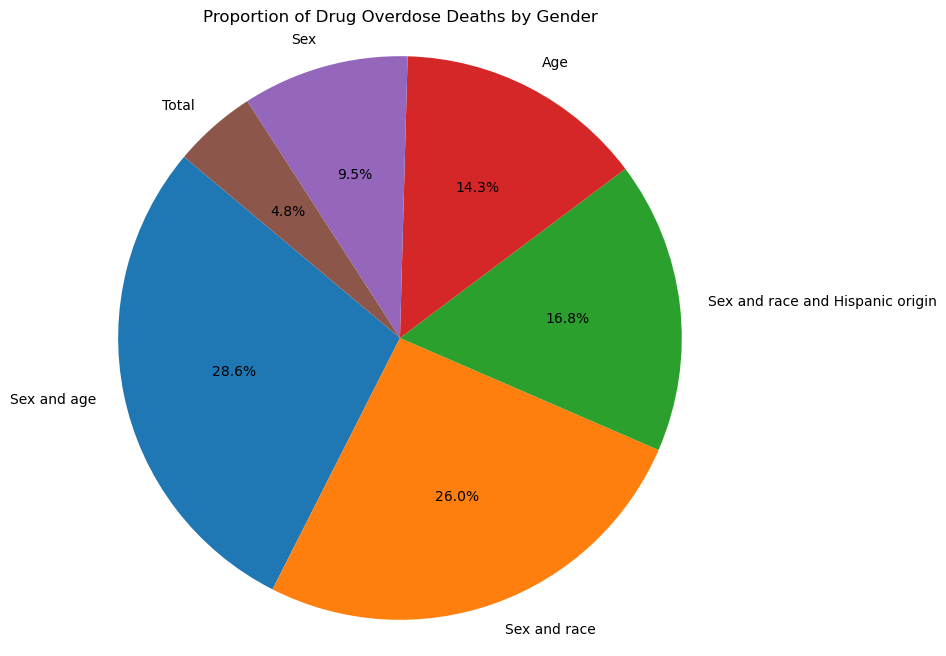

In [13]:
plt.figure(figsize=(8, 8))
gender_counts = drug_overdose_df['stub_name'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Drug Overdose Deaths by Gender')
plt.axis('equal')
plt.show()


In [14]:
drug_overdose_df['estimate'] = pd.to_numeric(drug_overdose_df['estimate'], errors='coerce')  # Convert 'estimate' to numeric
drug_overdose_df['year'] = pd.to_numeric(drug_overdose_df['year'], errors='coerce')  # Convert 'year' to numeric


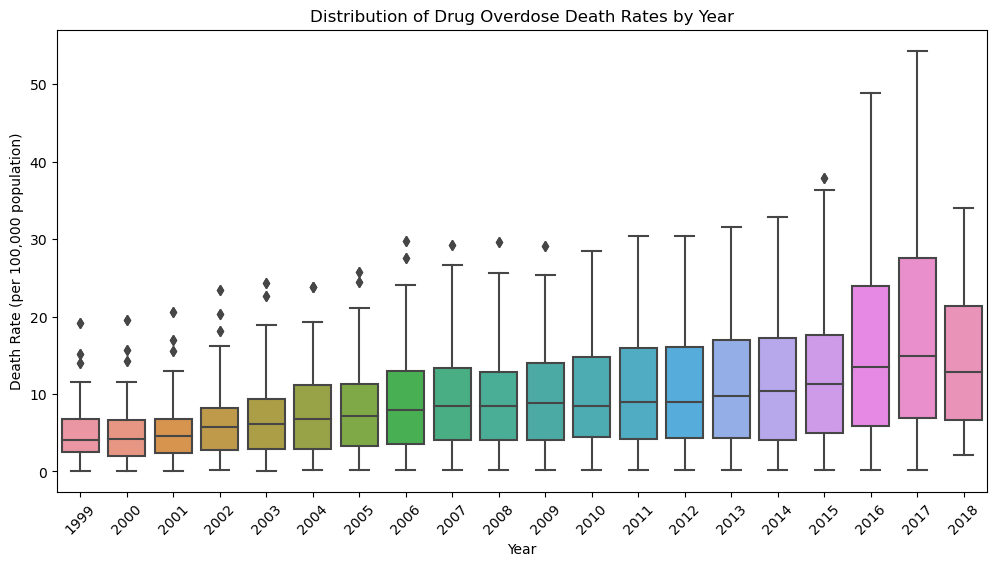

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='estimate', data=drug_overdose_df)
plt.title('Distribution of Drug Overdose Death Rates by Year')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.xticks(rotation=45)
plt.show()
